In [1]:
import numpy as np 
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier 
import sklearn.tree as tree

In [2]:
df = pd.read_csv('drug200.csv' , delimiter = ",")

In [3]:
df.head(25)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,drugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,drugY
9,43,M,LOW,NORMAL,19.368,drugY


In [4]:
df.shape

(200, 6)

In [5]:
X = df[['Age' , 'Sex' , 'BP' , 'Cholesterol' , 'Na_to_K']].values

In [6]:
X[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

In [7]:
for i in df.Sex.values :
    if i == 'M' :
        df.replace(i , 1 , inplace = True )
    else :
        df.replace (i,0 ,inplace =  True )
for i  in df.BP.values: 
    if i == 'LOW' :
        df.replace(i , 0 , inplace = True )
    elif i == 'NORMAL' : 
        df.replace(i , 1 , inplace = True )
    else :
        df.replace(i , 2 , inplace = True )
for i  in df.Cholesterol.values :
 
    if i == 'LOW' :
        df.replace(i , 0 , inplace = True )
    elif i == 'NORMAL' : 
        df.replace(i , 1 , inplace = True )
    else :
        df.replace(i , 2 , inplace = True )

In [8]:
df[0:5]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,2,2,25.355,drugY
1,47,2,0,2,13.093,drugC
2,47,2,0,2,10.114,drugC
3,28,0,2,2,7.798,drugX
4,61,0,0,2,18.043,drugY


In [9]:
y  = df['Drug']
X = df[['Age' , 'Sex' , 'BP' , 'Cholesterol' , 'Na_to_K']].values

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train , X_test , y_train , y_test =  train_test_split( X , y , test_size = 0.2 , random_state = 0 )

In [12]:
X_train.shape  

(160, 5)

In [13]:
y_train.shape 

(160,)

In [14]:
print('the shape of the x  train set is {}'.format(X_train.shape) , '&' , 'the shape of the y train is {}'.format(y_train.shape ))

the shape of the x  train set is (160, 5) & the shape of the y train is (160,)


In [15]:
model= DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [16]:
model

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [17]:
model.fit(X_train , y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [18]:
predTree = model.predict(X_test) 

In [19]:
df_comp =pd.DataFrame({'Actual' : y_test  , 'predct' :  predTree})

In [20]:
df_comp

,Actual,predct
18,drugC,drugC
170,drugX,drugA
107,drugY,drugY
98,drugY,drugY
177,drugY,drugY
182,drugX,drugC
5,drugX,drugA
146,drugX,drugX
12,drugY,drugY
152,drugX,drugB


In [21]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: {:.0%} ".format(metrics.accuracy_score(y_test, predTree))) 

DecisionTrees's Accuracy: 70% 


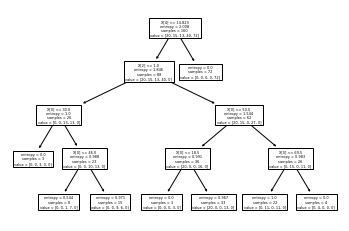

In [22]:


tree.plot_tree(model )
plt.show()

In [23]:
plt.savefig('tree_visualization01.png' , dpi='figure')  

<Figure size 432x288 with 0 Axes>